In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
num_edges_weekday_daily = []
num_edges_weekend_daily = []

for month in months:
    print(f'Processing month {month}')
    data = pd.read_csv(f'Data/2022{month}-citibike-tripdata.csv', low_memory=False)
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['start_day'] = data['started_at'].dt.dayofweek
    weekday_data = data[data['start_day'] < 5]
    weekend_data = data[data['start_day'] >= 5]
    num_weekdays = len(weekday_data['started_at'].dt.day.unique())
    num_weekends = len(weekend_data['started_at'].dt.day.unique())
    num_edges_weekday_daily.append(len(weekday_data) / num_weekdays)
    num_edges_weekend_daily.append(len(weekend_data) / num_weekends)

Processing month 01
Processing month 02
Processing month 03
Processing month 04
Processing month 05
Processing month 06
Processing month 07
Processing month 08
Processing month 09
Processing month 10
Processing month 11
Processing month 12


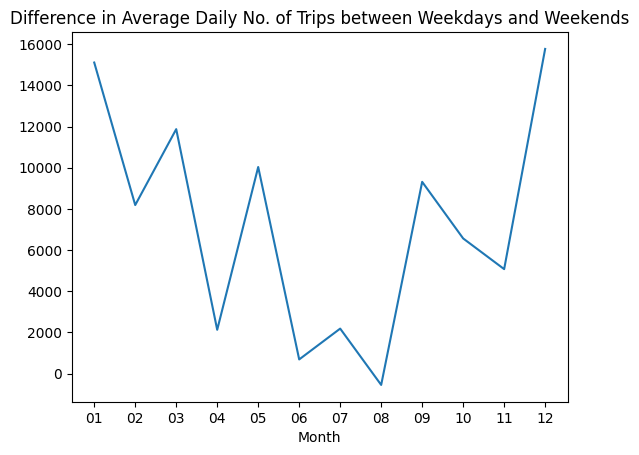

In [9]:
weekday_weekend_difference = np.array(num_edges_weekday_daily) - np.array(num_edges_weekend_daily)
plt.plot(months, weekday_weekend_difference)
plt.xlabel('Month')
plt.title('Difference in Average Daily No. of Trips between Weekdays and Weekends')
plt.show()